In [1]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
search_df = pd.read_csv('search_data.csv')
search_df.head()

,project,start,five_year_mark,end_date,handle,country
0,Konza tech,2013-01-01,2016-01-01,2020-12-31,konzatech,Kenya
1,Eko Atlantic,2009-01-01,2016-01-01,2020-12-31,EkoAtlantic,Nigeria
2,Waterfall City,2006-01-01,2016-01-01,2020-12-31,WaterfallCityZA,South Africa
3,Hope city,2013-01-01,2016-01-01,2020-12-31,NaN,Ghana
4,Vision city,2013-01-01,2016-01-01,2020-12-31,thevisioncity,Rwanda


In [3]:
emotions = ['Anger', 'Anticipation','Disgust','Fear', 'Joy','Sadness', 'Surprise', 'Trust']

Konza tech
--------------------
Anger: 56
Anticipation: 324
Disgust: 48
Fear: 48
Joy: 111
Sadness: 48
Surprise: 83
Trust: 291
Positive    215
Neutral      84
Negative     29
Name: sentiment, dtype: int64



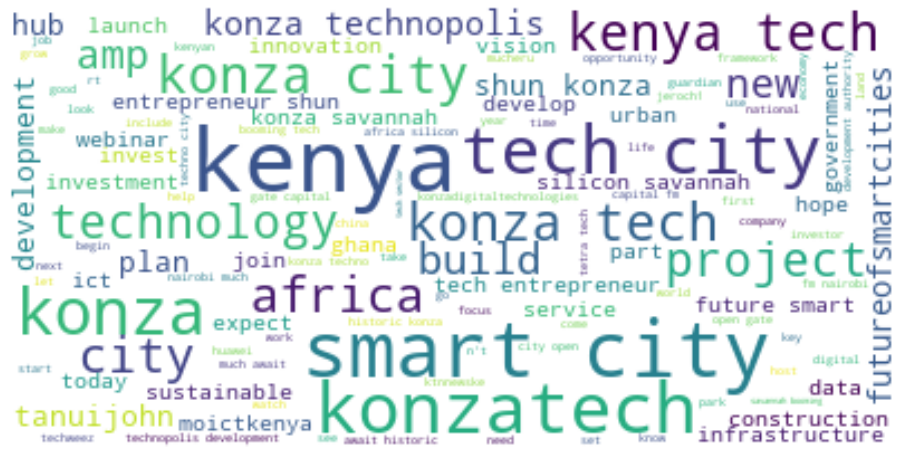

Eko Atlantic
--------------------
Anger: 292.0
Anticipation: 1389.0
Disgust: 222.0
Fear: 480.0
Joy: 861.0
Sadness: 304.0
Surprise: 361.0
Trust: 1280.0
Positive    898
Neutral     483
Negative    251
0             1
Name: sentiment, dtype: int64



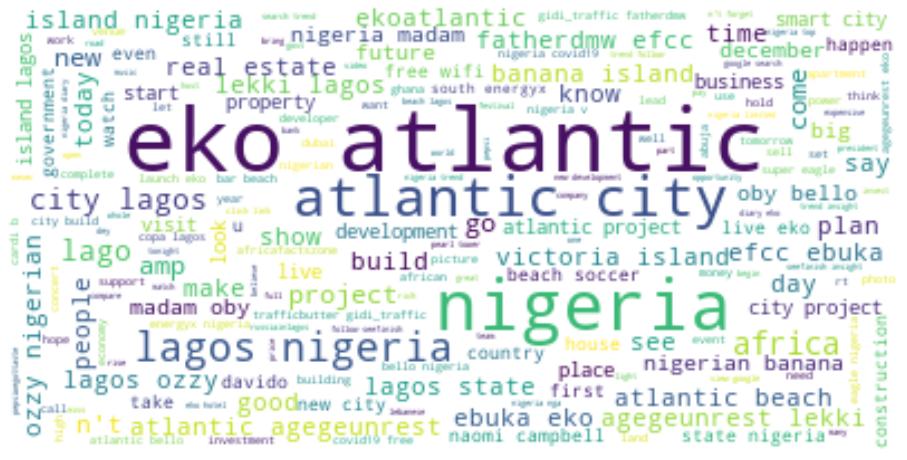

Waterfall City
--------------------
Anger: 10
Anticipation: 109
Disgust: 10
Fear: 15
Joy: 57
Sadness: 25
Surprise: 26
Trust: 84
Positive    68
Neutral     32
Negative     9
Name: sentiment, dtype: int64



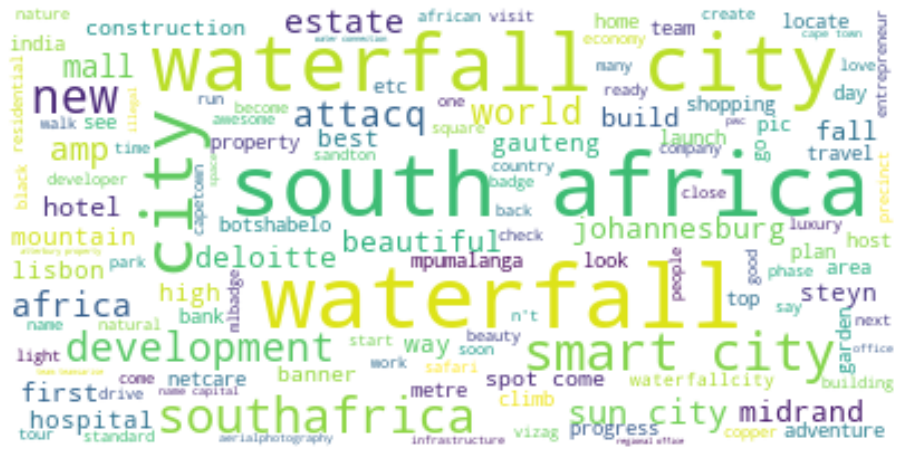

Hope city
--------------------
Anger: 75
Anticipation: 1558
Disgust: 139
Fear: 76
Joy: 1177
Sadness: 110
Surprise: 1089
Trust: 1322
Positive    866
Negative     41
Neutral      20
Name: sentiment, dtype: int64



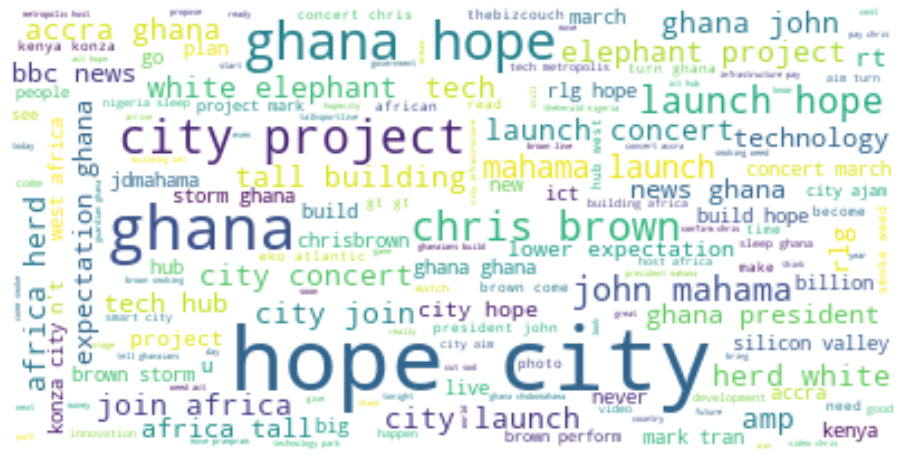

Vision city
--------------------
Anger: 40
Anticipation: 493
Disgust: 19
Fear: 27
Joy: 98
Sadness: 23
Surprise: 51
Trust: 135
Positive    292
Negative     23
Neutral      15
Name: sentiment, dtype: int64



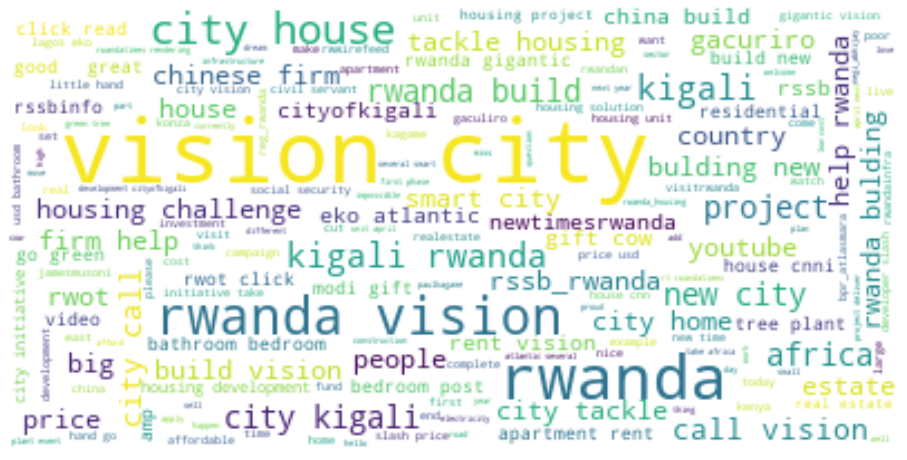

In [4]:
for project in search_df['project']:
    df_list = []
    for file in os.listdir('tweets'):
        if file.startswith(project):
            df_list.append(pd.read_csv(f'tweets/{file}'))
    super_df = pd.concat(df_list)
    sums = super_df.sum()
    print(project)
    print("-"*20)
    for emotion in emotions:
        print(f'{emotion}: {sums[emotion]}')
    print(super_df['sentiment'].value_counts())
    print()
    
    full_string = ""
    for words in super_df['edited']:
        full_string += f' {words}'
    full_string = full_string.replace("  ", " ")
    
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(full_string)

    # Display the generated image:
    plt.figure(figsize=(16, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()